# Elmas Fiyatı Tahmin Etme(Light Gradient Boosting ile %98.07 başarı)

# Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("diamonds.csv")

## Sütunlar
* carat: Karat (Bir karat 0,20 grama eşittir ve 100 puana bölünmüştür)
* cut: Kesim (Orta, İyi, Çok İyi, Premium, İdeal)
* color: Renk (D-J arası)
* clarity: Berraklık I1 (en kötü)--- SI2, SI1, VS2, VS1, VVS2, VVS1, IF (en iyi)
* depth: Derinlik 
* table: Tablo 
* ppice: fiyat 
* x (0 - 10,74): Elmasın uzunluğu (mm cinsinden)
* y (0 - 58,9): Elmasın genişliği (mm cinsinden)
* z (0 - 31,8): Elmasın derinliği (mm cinsinden)

In [11]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [13]:
df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
36863,36864,0.39,Ideal,F,VS1,62.2,56.0,958,4.63,4.70,2.90
2333,2334,0.75,Ideal,E,SI1,62.1,55.0,3170,5.81,5.85,3.62
32413,32414,0.41,Good,D,SI1,63.1,59.0,791,4.70,4.71,2.97
2994,2995,0.90,Good,I,VS2,63.8,55.0,3303,6.07,6.16,3.90
11028,11029,1.07,Ideal,H,SI1,62.0,57.0,4918,6.56,6.51,4.05
41576,41577,0.50,Fair,G,VS2,65.1,56.0,1238,5.02,4.99,3.26
28565,28566,0.30,Premium,H,VS1,62.6,59.0,675,4.30,4.26,2.68
19519,19520,1.52,Very Good,G,SI2,60.9,57.0,8151,7.44,7.50,4.55
5140,5141,1.00,Very Good,E,SI2,63.2,56.0,3763,6.40,6.32,4.02
34171,34172,0.33,Ideal,G,VS1,61.8,56.0,854,4.45,4.42,2.74


In [14]:
df.shape

(53940, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [16]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [17]:
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [18]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [20]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [21]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [23]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [25]:
abs(df.corr()['price'].sort_values(ascending=False)) #fiyatı en çok etkileyenleri görmek için

price         1.000000
carat         0.921591
x             0.884435
y             0.865421
z             0.861249
table         0.127134
depth         0.010647
Unnamed: 0    0.306873
Name: price, dtype: float64

In [28]:
df['price'].value_counts().max()

132

In [30]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [31]:
df['price'].nunique()

11602

<AxesSubplot:xlabel='price', ylabel='Density'>

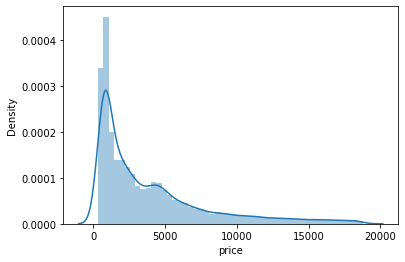

In [32]:
sns.distplot(df.price)

<AxesSubplot:xlabel='price'>

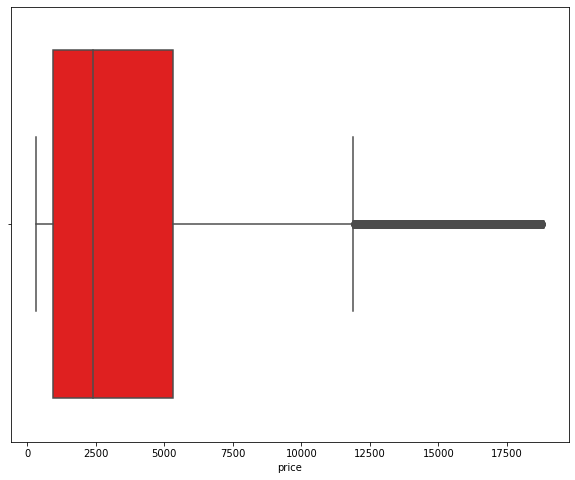

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(df.price, color='red')

# Data Cleaning

In [37]:
df = df.drop(["Unnamed: 0"], axis=1)
df.shape

(52321, 10)

# Outlier

In [34]:
df.quantile(0.97)

Unnamed: 0    52321.83
carat             2.01
depth            64.20
table            62.00
price         15072.83
x                 8.07
y                 8.05
z                 4.98
Name: 0.97, dtype: float64

In [35]:
outliers=df.quantile(.97)
df=df[(df.price<outliers['price'])]


In [40]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<40)]
df = df[(df["y"]<40)]
df = df[(df["z"]<40)&(df["z"]>2)]

In [47]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [49]:
#katogori sütunlarını sayıya çevirdik

In [44]:
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [50]:
df['cut']=df['cut']**2


In [55]:
x=pd.get_dummies(x, drop_first=True)

In [56]:
x

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75
...,...,...,...,...
53935,0.72,5.75,5.76,3.50
53936,0.72,5.69,5.75,3.61
53937,0.70,5.66,5.68,3.56
53938,0.86,6.15,6.12,3.74


## Regression Model

In [52]:
x=df[["carat", "x", "y","z"]]

In [57]:
y=df['price']

In [58]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [70]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.873538,1160.129751,681.355072
KNeighborsRegressor,0.854633,1243.828359,717.131836
Ridge,0.842376,1295.205313,789.328649
LinearRegression,0.842367,1295.241351,788.627467
Lasso,0.842216,1295.862278,793.723615
ElasticNet,0.788027,1501.991329,1020.375481
ExtraTreeRegressor,0.756667,1609.263773,910.591731


# Pycaret ile başarı oranım

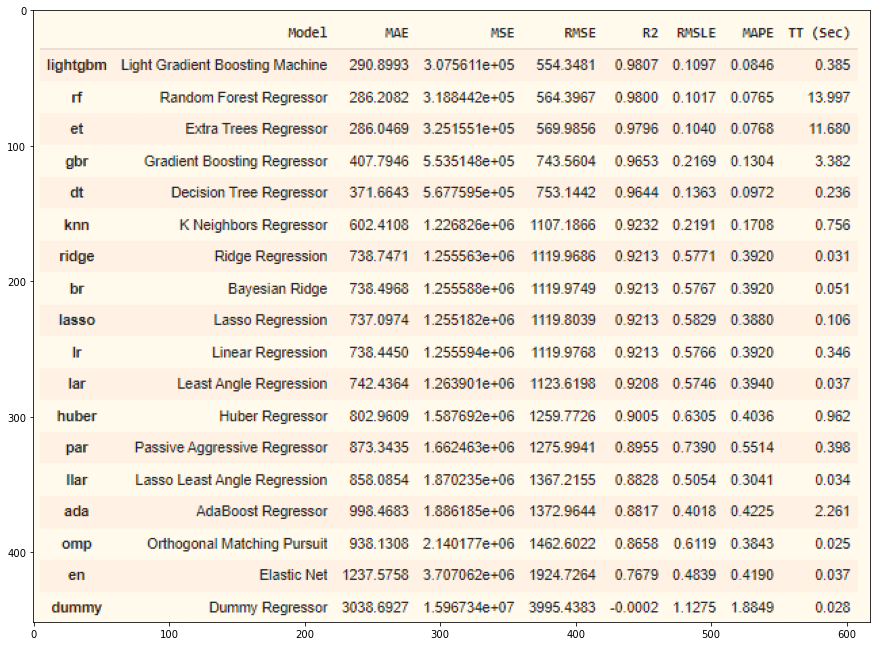

In [67]:
plt.figure(figsize=(15,15))
img=plt.imread('tempsnip.png')
plt.imshow(img)
plt.show();

In [68]:
##  Light Gradient Boosting ile %98.07 başarı elde ettim

# Deep Learning ile başarı oranım

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [61]:
df.shape

(52296, 10)

In [62]:
model = Sequential()
model.add(Dense(10,activation='relu'))  
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1)) 
model.compile(optimizer='Adam',loss='mse')

In [63]:
model.fit(x,y,batch_size=128, epochs=500) 
model.summary()

Epoch 1/500
409/409 [==============================] - 8s 7ms/step - loss: 17376342.0000
Epoch 2/500
409/409 [==============================] - 3s 6ms/step - loss: 7209516.0000
Epoch 3/500
409/409 [==============================] - 3s 6ms/step - loss: 6921314.0000
Epoch 4/500
409/409 [==============================] - 3s 7ms/step - loss: 6545464.5000
Epoch 5/500
409/409 [==============================] - 3s 8ms/step - loss: 5913847.0000
Epoch 6/500
409/409 [==============================] - 3s 8ms/step - loss: 3979098.5000
Epoch 7/500
409/409 [==============================] - 3s 8ms/step - loss: 1643676.0000
Epoch 8/500
409/409 [==============================] - 3s 8ms/step - loss: 1552315.3750
Epoch 9/500
409/409 [==============================] - 3s 7ms/step - loss: 1535163.8750
Epoch 10/500
409/409 [==============================] - 3s 8ms/step - loss: 1529879.6250
Epoch 11/500
409/409 [==============================] - 3s 7ms/step - loss: 1529143.8750
Epoch 12/500
409/409 [=======

409/409 [==============================] - 3s 6ms/step - loss: 1463396.0000
Epoch 94/500
409/409 [==============================] - 3s 7ms/step - loss: 1461593.3750
Epoch 95/500
409/409 [==============================] - 3s 7ms/step - loss: 1464018.2500
Epoch 96/500
409/409 [==============================] - 3s 6ms/step - loss: 1462165.5000
Epoch 97/500
409/409 [==============================] - 3s 8ms/step - loss: 1459682.5000
Epoch 98/500
409/409 [==============================] - 4s 10ms/step - loss: 1462403.0000
Epoch 99/500
409/409 [==============================] - 4s 10ms/step - loss: 1460435.5000
Epoch 100/500
409/409 [==============================] - 3s 7ms/step - loss: 1461432.2500
Epoch 101/500
409/409 [==============================] - 2s 6ms/step - loss: 1457937.3750
Epoch 102/500
409/409 [==============================] - 3s 7ms/step - loss: 1459907.7500
Epoch 103/500
409/409 [==============================] - 4s 10ms/step - loss: 1461166.2500
Epoch 104/500
409/409 [====

409/409 [==============================] - 3s 6ms/step - loss: 1442099.1250
Epoch 185/500
409/409 [==============================] - 3s 7ms/step - loss: 1444155.5000
Epoch 186/500
409/409 [==============================] - 3s 7ms/step - loss: 1446822.1250
Epoch 187/500
409/409 [==============================] - 3s 6ms/step - loss: 1442528.5000
Epoch 188/500
409/409 [==============================] - 3s 7ms/step - loss: 1442407.2500
Epoch 189/500
409/409 [==============================] - 2s 6ms/step - loss: 1445982.6250
Epoch 190/500
409/409 [==============================] - 2s 6ms/step - loss: 1444812.8750
Epoch 191/500
409/409 [==============================] - 2s 5ms/step - loss: 1448060.8750
Epoch 192/500
409/409 [==============================] - 3s 6ms/step - loss: 1443997.7500
Epoch 193/500
409/409 [==============================] - 4s 9ms/step - loss: 1444129.3750
Epoch 194/500
409/409 [==============================] - 3s 7ms/step - loss: 1444107.7500
Epoch 195/500
409/409 [=

409/409 [==============================] - 3s 8ms/step - loss: 1433993.1250
Epoch 276/500
409/409 [==============================] - 3s 8ms/step - loss: 1432768.6250
Epoch 277/500
409/409 [==============================] - 2s 6ms/step - loss: 1437841.3750
Epoch 278/500
409/409 [==============================] - 2s 6ms/step - loss: 1429399.6250
Epoch 279/500
409/409 [==============================] - 3s 7ms/step - loss: 1431519.1250
Epoch 280/500
409/409 [==============================] - 3s 8ms/step - loss: 1431665.8750
Epoch 281/500
409/409 [==============================] - 4s 9ms/step - loss: 1429730.0000
Epoch 282/500
409/409 [==============================] - 3s 7ms/step - loss: 1437922.6250
Epoch 283/500
409/409 [==============================] - 2s 6ms/step - loss: 1432483.3750
Epoch 284/500
409/409 [==============================] - 2s 5ms/step - loss: 1432182.5000
Epoch 285/500
409/409 [==============================] - 2s 5ms/step - loss: 1431050.0000
Epoch 286/500
409/409 [=

Epoch 495/500
409/409 [==============================] - 3s 6ms/step - loss: 1412685.5000
Epoch 496/500
409/409 [==============================] - 2s 6ms/step - loss: 1414273.5000
Epoch 497/500
409/409 [==============================] - 3s 8ms/step - loss: 1411110.7500
Epoch 498/500
409/409 [==============================] - 4s 9ms/step - loss: 1411481.1250
Epoch 499/500
409/409 [==============================] - 3s 8ms/step - loss: 1412531.1250
Epoch 500/500
409/409 [==============================] - 5s 12ms/step - loss: 1416422.2500
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 8)     

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [65]:
pred=model.predict(x)

1635/1635 [==============================] - 9s 5ms/step


In [66]:
r2_score(y,pred)  

0.8728205446691328